In [60]:
from pathlib import Path
import pandas as pd
import numpy as np

# Project root (folder where this script/notebook lives)
BASE_DIR = Path().resolve()

# Data folder
DATA_DIR = BASE_DIR / "data"

# File paths
barley_path = DATA_DIR / "barley_yield_from_1982.csv"
climate_path = DATA_DIR / "climate_data_from_1982.parquet"

# Load files
barley_df = pd.read_csv(barley_path, sep=";", index_col=0)
climate_df = pd.read_parquet(climate_path)

print(barley_df.head())
print(climate_df.head())


   department  year    yield     area  production
82        Ain  1982  3.95008  16065.0     63458.0
83        Ain  1983      NaN  14500.0     38400.0
84        Ain  1984  4.82258  15500.0     74750.0
85        Ain  1985  4.19677  15500.0     65050.0
86        Ain  1986  3.59845  12900.0     46420.0
         scenario nom_dep code_dep                time  year  \
29950  historical     Ain       01 1982-01-01 12:00:00  1982   
29951  historical     Ain       01 1982-01-02 12:00:00  1982   
29952  historical     Ain       01 1982-01-03 12:00:00  1982   
29953  historical     Ain       01 1982-01-04 12:00:00  1982   
29954  historical     Ain       01 1982-01-05 12:00:00  1982   

                             metric       value  
29950  near_surface_air_temperature  276.292267  
29951  near_surface_air_temperature  275.092407  
29952  near_surface_air_temperature  276.418518  
29953  near_surface_air_temperature  278.893372  
29954  near_surface_air_temperature  278.887207  


In [4]:
barley_df.describe()

,year,yield,area,production
count,3583.000000,3336.000000,3468.000000,3461.000000
mean,1999.971532,5.212239,18767.079585,110239.297180
std,10.664744,1.369354,20266.789390,133060.332166
min,1982.000000,0.813560,0.000000,0.000000
25%,1991.000000,4.242530,3766.500000,17240.000000
50%,2000.000000,5.261230,11810.500000,56744.900000
75%,2009.000000,6.225615,27495.500000,153285.200000
max,2018.000000,8.400000,119310.000000,919249.600000


In [5]:
barley_df.info()


<class 'pandas.DataFrame'>
Index: 3583 entries, 82 to 11536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   department  3583 non-null   str    
 1   year        3583 non-null   int64  
 2   yield       3336 non-null   float64
 3   area        3468 non-null   float64
 4   production  3461 non-null   float64
dtypes: float64(3), int64(1), str(1)
memory usage: 199.8 KB


In [8]:
barley_df.isna().sum()


department      0
year            0
yield         247
area          115
production    122
dtype: int64

In [27]:
barley_df["computed_production"] = barley_df["yield"] * barley_df["area"]

barley_df[["production", "computed_production"]].corr()


,production,computed_production
production,1.000000,0.999999
computed_production,0.999999,1.000000


In [28]:
barley_df[["yield", "area", "production"]].isna().sum(axis=1).value_counts()


0    3333
1     131
3     115
2       4
Name: count, dtype: int64

In [30]:
check = barley_df.dropna(subset=["yield", "area", "production"])

(
    (check["production"] / check["area"]) - check["yield"]
).abs().describe()

count    3.333000e+03
mean     1.170071e-03
std      6.127822e-03
min      0.000000e+00
25%      1.875167e-07
50%      1.981424e-06
75%      3.562003e-06
max      5.000000e-02
dtype: float64

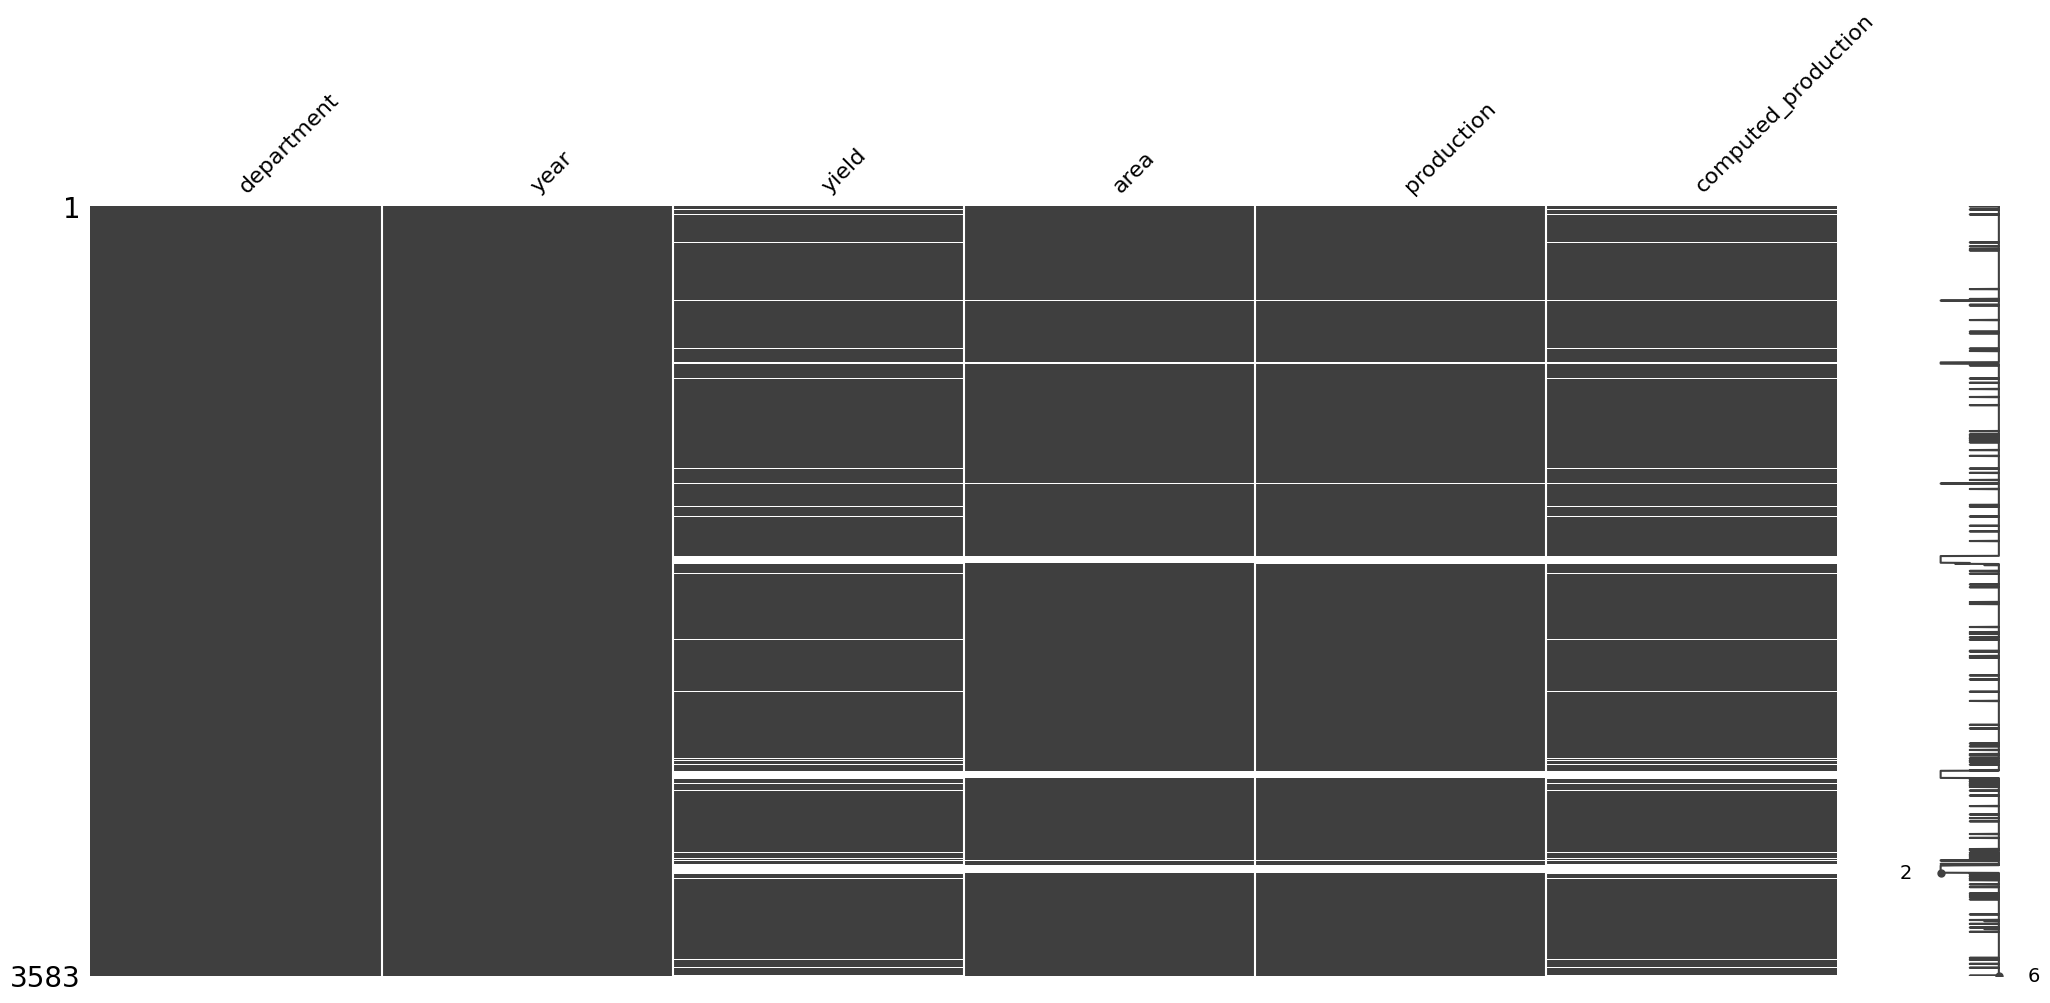

In [29]:
import missingno as msno
msno.matrix(barley_df)
plt.show()

In [9]:
barley_df.groupby("department")["yield"].agg(["mean", "std", "min", "max"])


,mean,std,min,max
department,,,,
Ain,5.469579,0.891030,3.59845,6.90000
Aisne,6.989706,0.605184,5.60000,8.40000
Allier,4.852052,0.825012,2.70789,5.95007
Alpes_Maritimes,3.254286,0.983122,0.81356,4.53704
Alpes_de_Haute_Provence,3.697194,0.488268,2.59536,4.46364
...,...,...,...,...
Vendee,5.368915,0.911777,2.82045,6.92233
Vienne,5.386209,0.832716,2.99556,6.89528
Vosges,5.396514,0.878957,2.62376,6.67500


In [11]:
climate_df.groupby("metric")["value"].describe()


,count,mean,std,min,25%,50%,75%,max
metric,,,,,,,,
daily_maximum_near_surface_air_temperature,4478308.0,288.603363,8.324001,2.532118e+02,2.824767e+02,287.805389,294.618103,319.311035
near_surface_air_temperature,4583500.0,283.964661,7.419903,2.455779e+02,2.786087e+02,283.396454,289.544655,307.876160
precipitation,4478308.0,0.000085,0.000172,-2.681981e-23,3.613616e-07,0.000013,0.000092,0.005103


In [12]:
climate_df[climate_df["metric"] == "near_surface_air_temperature"]["value"].describe()

count    4.583500e+06
mean     2.839647e+02
std      7.419903e+00
min      2.455779e+02
25%      2.786087e+02
50%      2.833965e+02
75%      2.895447e+02
max      3.078762e+02
Name: value, dtype: float64

In [13]:
barley_df

,department,year,yield,area,production
82,Ain,1982,3.95008,16065.0,63458.00
83,Ain,1983,NaN,14500.0,38400.00
84,Ain,1984,4.82258,15500.0,74750.00
85,Ain,1985,4.19677,15500.0,65050.00
86,Ain,1986,3.59845,12900.0,46420.00
...,...,...,...,...,...
11532,Yvelines,2014,7.70000,10180.0,78546.00
11533,Yvelines,2015,8.00000,11420.0,91400.50
11534,Yvelines,2016,NaN,12225.0,64792.50
11535,Yvelines,2017,7.31000,13735.0,100402.85


In [14]:
climate_df

,scenario,nom_dep,code_dep,time,year,metric,value
29950,historical,Ain,01,1982-01-01 12:00:00,1982,near_surface_air_temperature,2.762923e+02
29951,historical,Ain,01,1982-01-02 12:00:00,1982,near_surface_air_temperature,2.750924e+02
29952,historical,Ain,01,1982-01-03 12:00:00,1982,near_surface_air_temperature,2.764185e+02
29953,historical,Ain,01,1982-01-04 12:00:00,1982,near_surface_air_temperature,2.788934e+02
29954,historical,Ain,01,1982-01-05 12:00:00,1982,near_surface_air_temperature,2.788872e+02
...,...,...,...,...,...,...,...
1170256,ssp5_8_5,Yvelines,78,2050-12-27 12:00:00,2050,precipitation,3.356686e-05
1170257,ssp5_8_5,Yvelines,78,2050-12-28 12:00:00,2050,precipitation,3.531645e-06
1170258,ssp5_8_5,Yvelines,78,2050-12-29 12:00:00,2050,precipitation,4.072561e-06
1170259,ssp5_8_5,Yvelines,78,2050-12-30 12:00:00,2050,precipitation,4.087608e-09


In [ ]:
climate_df["time"] = pd.to_datetime(climate_df["time"])

In [16]:
climate_df["year"] = climate_df["time"].dt.year
climate_df.groupby("year")["value"].mean()

year
1982    190.332870
1983    189.562759
1984    189.770966
1985    189.639648
1986    190.006485
           ...    
2046    192.332672
2047    192.075363
2048    192.489761
2049    192.807068
2050    192.254700
Name: value, Length: 69, dtype: float32

In [ ]:
climate_df["scenario"].unique()

<ArrowStringArray>
['historical', 'ssp1_2_6', 'ssp2_4_5', 'ssp5_8_5']
Length: 4, dtype: str

### EDA Barley

In [31]:
mask = (
    barley_df["yield"].isna() &
    barley_df["area"].notna() &
    barley_df["production"].notna()
)

barley_df.loc[mask, "yield"] = (
    barley_df.loc[mask, "production"] /
    barley_df.loc[mask, "area"]
)
barley_df["yield"].isna().sum()

np.int64(122)

In [74]:
barley_df["department"].unique()

<ArrowStringArray>
[                    'Ain',                   'Aisne',
                  'Allier', 'Alpes_de_Haute_Provence',
         'Alpes_Maritimes',                 'Ardeche',
                'Ardennes',                  'Ariege',
                    'Aube',                    'Aude',
                 'Aveyron',                'Bas_Rhin',
        'Bouches_du_Rhone',                'Calvados',
                  'Cantal',                'Charente',
       'Charente_Maritime',                    'Cher',
                 'Correze',            'Corse_du_Sud',
               'Cote_d_Or',           'Cotes_d_Armor',
                  'Creuse',             'Deux_Sevres',
                'Dordogne',                   'Doubs',
                   'Drome',                 'Essonne',
                    'Eure',            'Eure_et_Loir',
               'Finistere',                    'Gard',
                    'Gers',                 'Gironde',
               'Haut_Rhin',             'Haute

In [34]:
barley_clean = barley_df.copy()
barley_clean = barley_clean.dropna(
    subset=["yield", "area", "production"],
    how="all"
)

In [35]:
barley_clean = barley_clean.dropna(subset=["yield"])
barley_clean["yield"].isna().sum()

np.int64(0)

In [36]:
print("Original shape:", barley_df.shape)
print("Clean shape:", barley_clean.shape)


Original shape: (3583, 6)
Clean shape: (3461, 6)


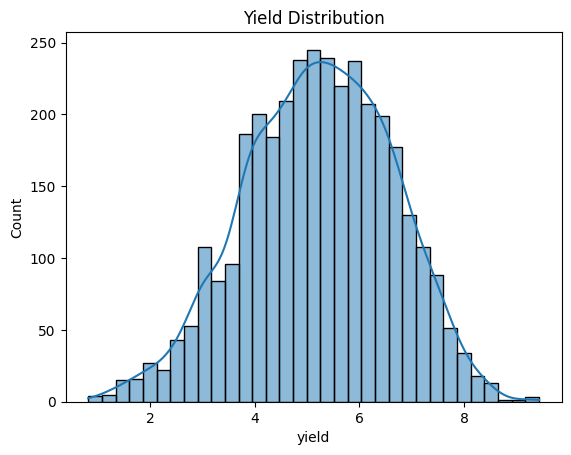

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
#yield distribution
sns.histplot(barley_clean["yield"], kde=True)
plt.title("Yield Distribution")
plt.show()

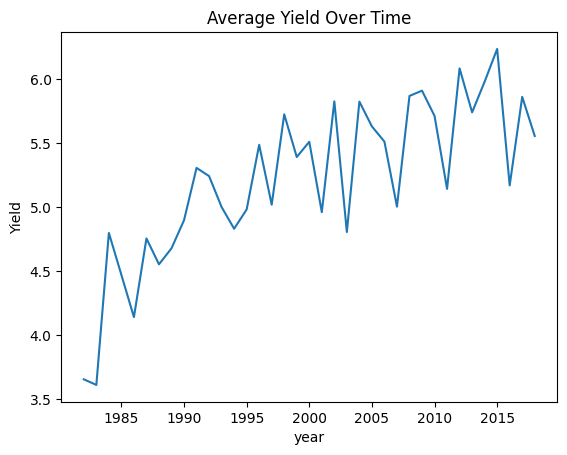

In [39]:
barley_clean.groupby("year")["yield"].mean().plot()
plt.title("Average Yield Over Time")
plt.ylabel("Yield")
plt.show()

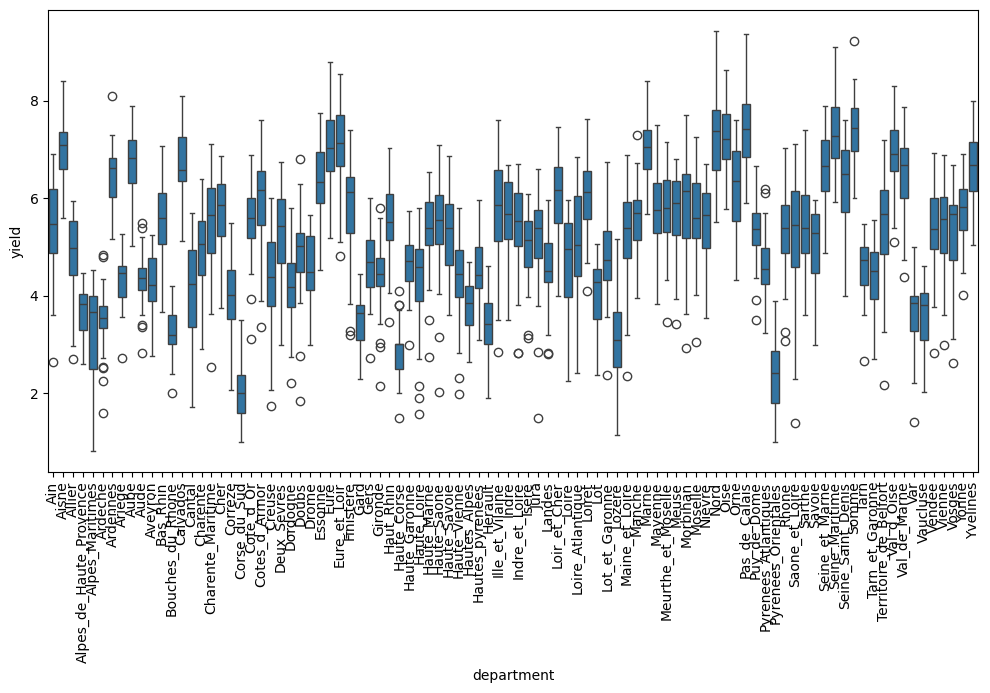

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(data=barley_clean, x="department", y="yield")
plt.xticks(rotation=90)
plt.show()


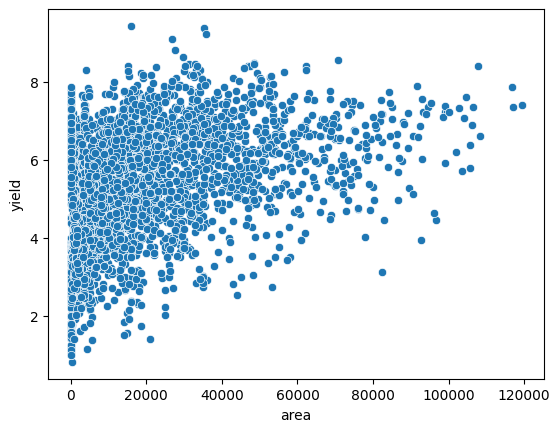

In [41]:
sns.scatterplot(data=barley_clean, x="area", y="yield")
plt.show()

In [43]:
barley_clean.groupby("year")["yield"].mean().head()
barley_clean.groupby("year")["yield"].mean().tail()


year
2014    5.980350
2015    6.236235
2016    5.170532
2017    5.861809
2018    5.556559
Name: yield, dtype: float64

### Climate EDA

In [44]:
climate_df["metric"].unique()


<ArrowStringArray>
[              'near_surface_air_temperature',
 'daily_maximum_near_surface_air_temperature',
                              'precipitation']
Length: 3, dtype: str

In [45]:
climate_hist = climate_df[climate_df["scenario"] == "historical"]
climate_future = climate_df[climate_df["scenario"] != "historical"]

In [46]:
climate_yearly = (
    climate_df
    .groupby(["scenario", "nom_dep", "year", "metric"])["value"]
    .mean()
    .reset_index()
)


In [47]:
climate_pivot = climate_yearly.pivot(
    index=["scenario", "nom_dep", "year"],
    columns="metric",
    values="value"
).reset_index()

In [48]:
climate_pivot = climate_pivot.rename(columns={"nom_dep": "department"})

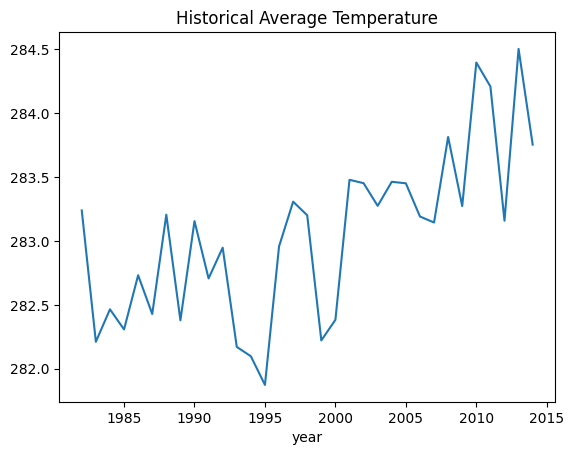

In [49]:
hist_temp = climate_pivot[
    climate_pivot["scenario"] == "historical"
]

hist_temp.groupby("year")["near_surface_air_temperature"].mean().plot()
plt.title("Historical Average Temperature")
plt.show()


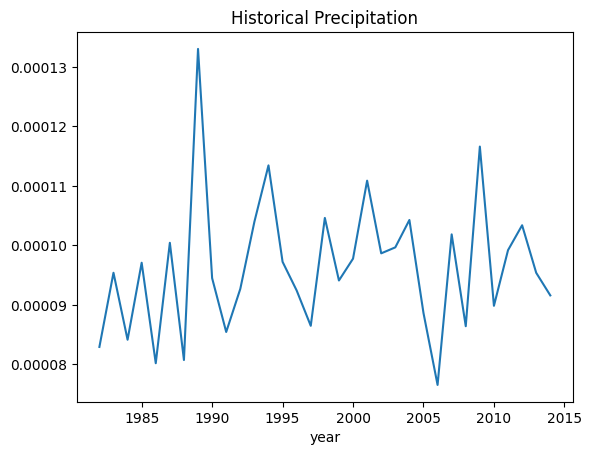

In [50]:
hist_temp.groupby("year")["precipitation"].mean().plot()
plt.title("Historical Precipitation")
plt.show()


In [52]:
avg_temp = climate_pivot.groupby(
    ["scenario", "year"]
)["near_surface_air_temperature"].mean().reset_index()


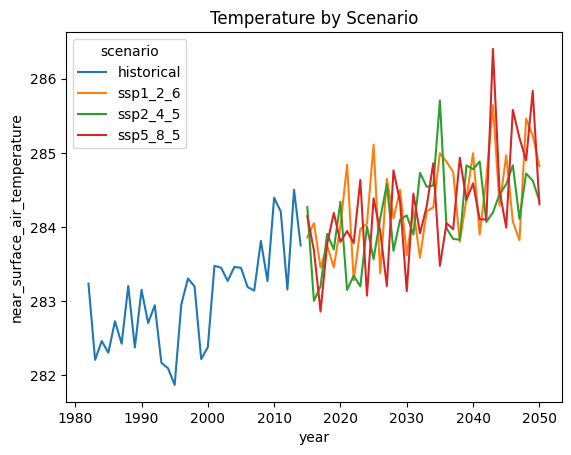

In [53]:
import seaborn as sns

sns.lineplot(
    data=avg_temp,
    x="year",
    y="near_surface_air_temperature",
    hue="scenario"
)
plt.title("Temperature by Scenario")
plt.show()


### Modeling

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
barley = barley_df.copy()

# Reconstruct yield when possible
mask = barley["yield"].isna() & barley["area"].notna() & barley["production"].notna() & (barley["area"] > 0)
barley.loc[mask, "yield"] = barley.loc[mask, "production"] / barley.loc[mask, "area"]

# Drop rows where all 3 agri vars are missing
barley = barley.dropna(subset=["yield", "area", "production"], how="all").copy()

# Target must exist
barley = barley.dropna(subset=["yield"]).copy()

# Enforce numeric types
for c in ["yield", "area", "production"]:
    barley[c] = pd.to_numeric(barley[c], errors="coerce")

barley["year"] = pd.to_numeric(barley["year"], errors="coerce").astype("Int64")

print(barley.shape)
barley[["yield","area","production"]].isna().sum()

(3461, 6)


yield         0
area          0
production    3
dtype: int64

In [56]:
climate = climate_df.copy()

climate["time"] = pd.to_datetime(climate["time"], errors="coerce")
climate["year"] = climate["time"].dt.year.astype("Int64")
climate["value"] = pd.to_numeric(climate["value"], errors="coerce")

print(climate.shape)
climate[["scenario","nom_dep","code_dep","time","year","metric","value"]].isna().sum()

(13540116, 7)


scenario    0
nom_dep     0
code_dep    0
time        0
year        0
metric      0
value       0
dtype: int64

In [57]:
w = (
    climate
    .pivot_table(
        index=["scenario","code_dep","nom_dep","time","year"],
        columns="metric",
        values="value",
        aggfunc="mean"
    )
    .reset_index()
)

w.columns.name = None
w.head()

,scenario,code_dep,nom_dep,time,year,daily_maximum_near_surface_air_temperature,near_surface_air_temperature,precipitation
0,historical,01,Ain,1982-01-01 12:00:00,1982,279.337311,276.292267,0.000033
1,historical,01,Ain,1982-01-02 12:00:00,1982,277.687225,275.092407,0.000139
2,historical,01,Ain,1982-01-03 12:00:00,1982,278.388794,276.418518,0.000091
3,historical,01,Ain,1982-01-04 12:00:00,1982,283.519043,278.893372,0.000057
4,historical,01,Ain,1982-01-05 12:00:00,1982,281.122253,278.887207,0.000257


In [58]:
# Kelvin -> Celsius
temp_cols = ["near_surface_air_temperature", "daily_maximum_near_surface_air_temperature"]
for col in temp_cols:
    if col in w.columns:
        w[col] = w[col] - 273.15

# precip (mm/s) -> mm/day
if "precipitation" in w.columns:
    w["precipitation_mm_day"] = w["precipitation"] * 86400.0

w[["near_surface_air_temperature","daily_maximum_near_surface_air_temperature","precipitation_mm_day"]].describe()

,near_surface_air_temperature,daily_maximum_near_surface_air_temperature,precipitation_mm_day
count,4.583500e+06,4.478308e+06,4.478308e+06
mean,1.081467e+01,1.545337e+01,7.338108e+00
std,7.419903e+00,8.324001e+00,1.481961e+01
min,-2.757205e+01,-1.993820e+01,-2.317232e-18
25%,5.458740e+00,9.326752e+00,3.122164e-02
50%,1.024646e+01,1.465540e+01,1.155305e+00
75%,1.639466e+01,2.146811e+01,7.960360e+00
max,3.472617e+01,4.616104e+01,4.409006e+02


In [61]:
GROW_START, GROW_END = 3, 7   # Mar..Jul
TBASE = 5.0
HEAT_TH = 30.0
DRY_TH = 1.0  # mm/day

w["month"] = w["time"].dt.month
gs = w[(w["month"] >= GROW_START) & (w["month"] <= GROW_END)].copy()

# Hot day indicator
gs["hot_day"] = (gs["daily_maximum_near_surface_air_temperature"] > HEAT_TH).astype(int)

# Dry day indicator
gs["dry_day"] = (gs["precipitation_mm_day"] < DRY_TH).astype(int)

# Growing degree days per day
gs["gdd_day"] = np.maximum(gs["near_surface_air_temperature"] - TBASE, 0.0)

gs.head()

,scenario,code_dep,nom_dep,time,year,daily_maximum_near_surface_air_temperature,near_surface_air_temperature,precipitation,precipitation_mm_day,month,hot_day,dry_day,gdd_day
59,historical,01,Ain,1982-03-01 12:00:00,1982,4.657684,2.936859,0.000502,43.401073,3,0,0,0.0
60,historical,01,Ain,1982-03-02 12:00:00,1982,-0.897095,-2.615814,0.000091,7.823861,3,0,0,0.0
61,historical,01,Ain,1982-03-03 12:00:00,1982,1.588470,-1.741486,0.000003,0.288050,3,0,1,0.0
62,historical,01,Ain,1982-03-04 12:00:00,1982,7.511322,4.051758,0.000091,7.899230,3,0,0,0.0
63,historical,01,Ain,1982-03-05 12:00:00,1982,8.094208,4.353790,0.000091,7.891322,3,0,0,0.0


In [62]:
def max_consecutive_ones(x: pd.Series) -> int:
    run = 0
    best = 0
    for v in x.values:
        if v == 1:
            run += 1
            best = max(best, run)
        else:
            run = 0
    return best

In [63]:
feat = (
    gs.groupby(["scenario","code_dep","nom_dep","year"], as_index=False)
      .agg(
          tmean_gs=("near_surface_air_temperature","mean"),
          tmax_gs=("daily_maximum_near_surface_air_temperature","mean"),
          prcp_gs=("precipitation_mm_day","sum"),
          hot_days=("hot_day","sum"),
          gdd=("gdd_day","sum"),
          max_consec_dry=("dry_day", max_consecutive_ones),
          n_days=("dry_day","size")
      )
)

feat.head()

,scenario,code_dep,nom_dep,year,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days
0,historical,01,Ain,1982,11.995357,16.836538,1098.971313,3,1115.857788,8,153
1,historical,01,Ain,1983,11.331988,16.087030,1080.625122,0,1029.932861,12,153
2,historical,01,Ain,1984,11.959189,16.997242,1156.371826,0,1087.771729,7,153
3,historical,01,Ain,1985,11.119705,15.996710,1166.247559,0,970.348083,14,153
4,historical,01,Ain,1986,11.808128,16.717556,893.017456,0,1068.690063,20,153


In [64]:
import unicodedata, re

def norm_dep(s: str) -> str:
    s = str(s)
    s = unicodedata.normalize("NFKD", s).encode("ascii","ignore").decode("ascii")
    s = s.lower().replace("'", "")
    s = re.sub(r"[\s\-]+", "_", s)
    s = re.sub(r"[^a-z0-9_]", "", s)
    return s

barley = barley.copy()
feat = feat.copy()

barley["dep_norm"] = barley["department"].map(norm_dep)
feat["dep_norm"] = feat["nom_dep"].map(norm_dep)

barley[["department","dep_norm"]].drop_duplicates().head(10)

,department,dep_norm
82,Ain,ain
201,Aisne,aisne
320,Allier,allier
439,Alpes_de_Haute_Provence,alpes_de_haute_provence
558,Alpes_Maritimes,alpes_maritimes
677,Ardeche,ardeche
796,Ardennes,ardennes
915,Ariege,ariege
1034,Aube,aube
1153,Aude,aude


In [65]:
feat_hist = feat[feat["scenario"] == "historical"].copy()

train_df = barley.merge(
    feat_hist,
    on=["dep_norm","year"],
    how="inner"
)

print(train_df.shape)
train_df.head()

(2935, 17)


,department,year,yield,area,production,computed_production,dep_norm,scenario,code_dep,nom_dep,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days
0,Ain,1982,3.950080,16065.0,63458.0,63458.0352,ain,historical,01,Ain,11.995357,16.836538,1098.971313,3,1115.857788,8,153
1,Ain,1983,2.648276,14500.0,38400.0,NaN,ain,historical,01,Ain,11.331988,16.087030,1080.625122,0,1029.932861,12,153
2,Ain,1984,4.822580,15500.0,74750.0,74749.9900,ain,historical,01,Ain,11.959189,16.997242,1156.371826,0,1087.771729,7,153
3,Ain,1985,4.196770,15500.0,65050.0,65049.9350,ain,historical,01,Ain,11.119705,15.996710,1166.247559,0,970.348083,14,153
4,Ain,1986,3.598450,12900.0,46420.0,46420.0050,ain,historical,01,Ain,11.808128,16.717556,893.017456,0,1068.690063,20,153


In [66]:
feature_cols_base = ["tmean_gs","tmax_gs","prcp_gs","hot_days","gdd","max_consec_dry"]
target_col = "yield"

df = train_df.dropna(subset=feature_cols_base + [target_col]).copy()

test_start_year = 2011
tr = df[df["year"] < test_start_year].copy()
te = df[df["year"] >= test_start_year].copy()

print("Train:", tr.shape, " | Test:", te.shape)
print("Train years:", int(tr["year"].min()), "-", int(tr["year"].max()))
print("Test years :", int(te["year"].min()), "-", int(te["year"].max()))

Train: (2581, 17)  | Test: (354, 17)
Train years: 1982 - 2010
Test years : 2011 - 2014


<Axes: >

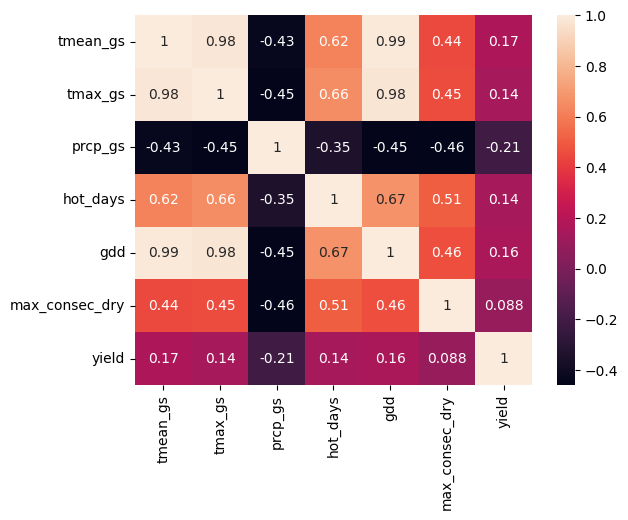

In [82]:
import seaborn as sns
sns.heatmap(train_df[feature_cols_base + ["yield"]].corr(), annot=True)


In [67]:
dep_mean = tr.groupby("dep_norm")[target_col].mean()

pred_baseline = te["dep_norm"].map(dep_mean)
mae_baseline = mean_absolute_error(te[target_col], pred_baseline)

print("Baseline MAE (dep mean):", mae_baseline)

Baseline MAE (dep mean): 0.7904304046044516


In [68]:
from xgboost import XGBRegressor

X_tr = tr[feature_cols_base]
y_tr = tr[target_col]
X_te = te[feature_cols_base]
y_te = te[target_col]

xgb = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_te)

mae = mean_absolute_error(y_te, pred)
rmse = mean_squared_error(y_te, pred) ** 0.5
r2 = r2_score(y_te, pred)

print("XGB MAE :", mae)
print("XGB RMSE:", rmse)
print("XGB R2  :", r2)

XGB MAE : 1.0137384799407168
XGB RMSE: 1.2587505693919443
XGB R2  : 0.014890426294653758


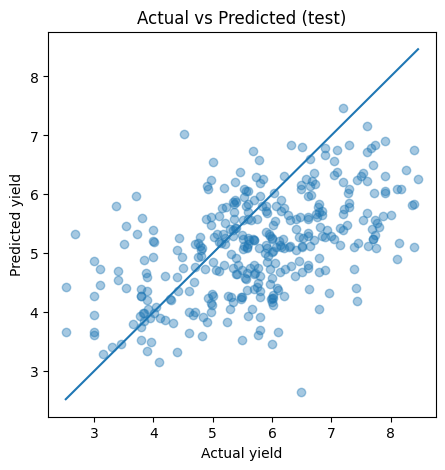

In [69]:
plt.figure(figsize=(5,5))
plt.scatter(y_te, pred, alpha=0.4)
plt.xlabel("Actual yield")
plt.ylabel("Predicted yield")
plt.title("Actual vs Predicted (test)")
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()])
plt.show()

In [70]:
feature_cols_plus = feature_cols_base + ["year"]

tr_plus = tr[feature_cols_plus + ["dep_norm", target_col]].copy()
te_plus = te[feature_cols_plus + ["dep_norm", target_col]].copy()

X_tr2 = pd.get_dummies(tr_plus[feature_cols_plus + ["dep_norm"]], columns=["dep_norm"], drop_first=True)
X_te2 = pd.get_dummies(te_plus[feature_cols_plus + ["dep_norm"]], columns=["dep_norm"], drop_first=True)

# Align columns
X_te2 = X_te2.reindex(columns=X_tr2.columns, fill_value=0)

y_tr2 = tr_plus[target_col]
y_te2 = te_plus[target_col]

xgb2 = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb2.fit(X_tr2, y_tr2)
pred2 = xgb2.predict(X_te2)

print("XGB+year+dep MAE :", mean_absolute_error(y_te2, pred2))
print("XGB+year+dep RMSE:", mean_squared_error(y_te2, pred2) ** 0.5)
print("XGB+year+dep R2  :", r2_score(y_te2, pred2))

XGB+year+dep MAE : 0.5432073105033767
XGB+year+dep RMSE: 0.6786055792029188
XGB+year+dep R2  : 0.713687683003495


In [71]:
scenarios = ["ssp1_2_6","ssp2_4_5","ssp5_8_5"]
future_feat = feat[feat["scenario"].isin(scenarios)].dropna(subset=feature_cols_base).copy()

# include year + dep_norm encoding
future_feat["year"] = future_feat["year"].astype("Int64")
X_future = pd.get_dummies(
    future_feat[feature_cols_plus + ["dep_norm"]],
    columns=["dep_norm"],
    drop_first=True
)

X_future = X_future.reindex(columns=X_tr2.columns, fill_value=0)
future_feat["pred_yield"] = xgb2.predict(X_future)

future_feat.head()

,scenario,code_dep,nom_dep,year,tmean_gs,tmax_gs,prcp_gs,hot_days,gdd,max_consec_dry,n_days,dep_norm,pred_yield
2937,ssp1_2_6,01,Ain,2015,13.263169,18.679577,892.335144,4,1294.023438,17,153,ain,6.297297
2938,ssp1_2_6,01,Ain,2016,13.131767,18.152515,1146.179565,2,1250.838623,11,153,ain,6.076293
2939,ssp1_2_6,01,Ain,2017,12.833161,17.885670,928.741028,0,1208.664551,5,153,ain,6.060443
2940,ssp1_2_6,01,Ain,2018,12.809212,17.919216,1271.843384,1,1199.781372,7,153,ain,6.200750
2941,ssp1_2_6,01,Ain,2019,11.779666,16.699438,1001.862915,2,1090.855957,13,153,ain,6.200649


In [72]:
baseline_years = (2010, 2018)

baseline = (
    barley[(barley["year"]>=baseline_years[0]) & (barley["year"]<=baseline_years[1])]
    .groupby("dep_norm", as_index=False)["yield"].mean()
    .rename(columns={"yield":"baseline_yield"})
)

proj = future_feat.merge(baseline, on="dep_norm", how="left")
proj["yield_change_pct"] = (proj["pred_yield"] - proj["baseline_yield"]) / proj["baseline_yield"] * 100

proj[["scenario","nom_dep","year","pred_yield","baseline_yield","yield_change_pct"]].head(10)

,scenario,nom_dep,year,pred_yield,baseline_yield,yield_change_pct
0,ssp1_2_6,Ain,2015,6.297297,6.142131,2.526255
1,ssp1_2_6,Ain,2016,6.076293,6.142131,-1.071910
2,ssp1_2_6,Ain,2017,6.060443,6.142131,-1.329957
3,ssp1_2_6,Ain,2018,6.200750,6.142131,0.954379
4,ssp1_2_6,Ain,2019,6.200649,6.142131,0.952734
5,ssp1_2_6,Ain,2020,5.660616,6.142131,-7.839538
6,ssp1_2_6,Ain,2021,5.638839,6.142131,-8.194092
7,ssp1_2_6,Ain,2022,6.156381,6.142131,0.231997
8,ssp1_2_6,Ain,2023,6.194854,6.142131,0.858378
9,ssp1_2_6,Ain,2024,6.089474,6.142131,-0.857315


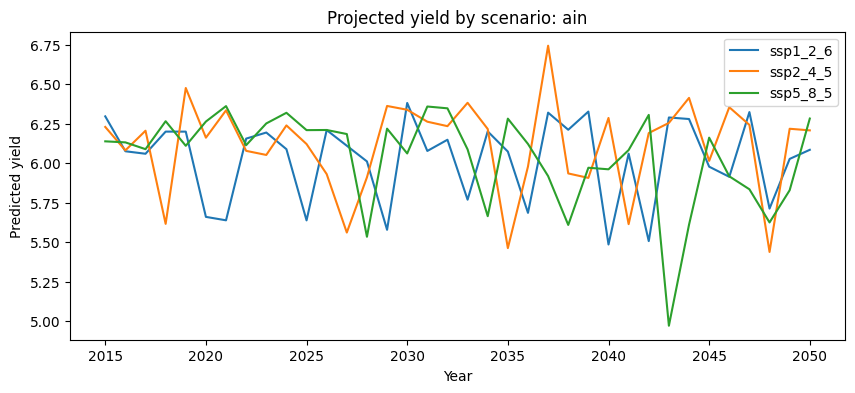

In [73]:
dep_show = "ain"
p = proj[proj["dep_norm"] == dep_show].copy()

plt.figure(figsize=(10,4))
for sc, g in p.groupby("scenario"):
    g = g.sort_values("year")
    plt.plot(g["year"], g["pred_yield"], label=sc)
plt.title(f"Projected yield by scenario: {dep_show}")
plt.xlabel("Year")
plt.ylabel("Predicted yield")
plt.legend()
plt.show()

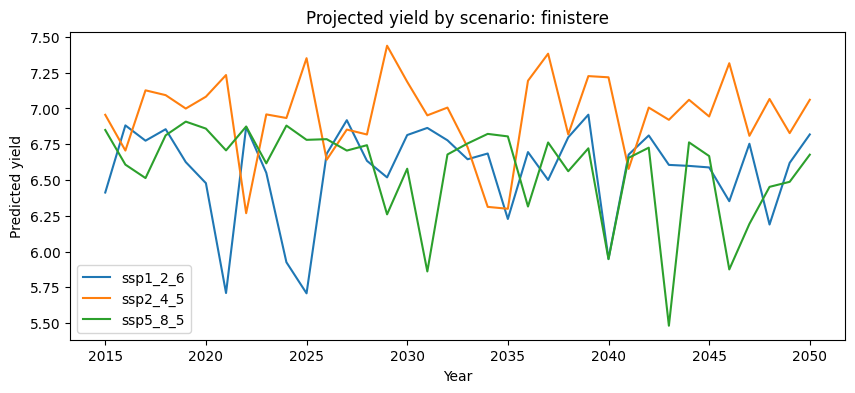

In [76]:
dep_show = "finistere"
p = proj[proj["dep_norm"] == dep_show].copy()

plt.figure(figsize=(10,4))
for sc, g in p.groupby("scenario"):
    g = g.sort_values("year")
    plt.plot(g["year"], g["pred_yield"], label=sc)
plt.title(f"Projected yield by scenario: {dep_show}")
plt.xlabel("Year")
plt.ylabel("Predicted yield")
plt.legend()
plt.show()

In [77]:
climate_pivot.groupby(["scenario","year"])["near_surface_air_temperature"].mean().unstack("scenario")

scenario,historical,ssp1_2_6,ssp2_4_5,ssp5_8_5
year,,,,
1982,283.238708,NaN,NaN,NaN
1983,282.210480,NaN,NaN,NaN
1984,282.464844,NaN,NaN,NaN
1985,282.307281,NaN,NaN,NaN
1986,282.731689,NaN,NaN,NaN
...,...,...,...,...
2046,NaN,284.072998,284.832672,285.579651
2047,NaN,283.824493,284.111176,285.200623
2048,NaN,285.461517,284.722626,284.901886


In [78]:
proj.groupby(["scenario"])["pred_yield"].mean()

scenario
ssp1_2_6    5.828856
ssp2_4_5    5.986381
ssp5_8_5    5.843393
Name: pred_yield, dtype: float32

In [79]:
proj.groupby("scenario")["pred_yield"].std()

scenario
ssp1_2_6    1.094868
ssp2_4_5    1.049104
ssp5_8_5    1.088489
Name: pred_yield, dtype: float32

<Axes: xlabel='year'>

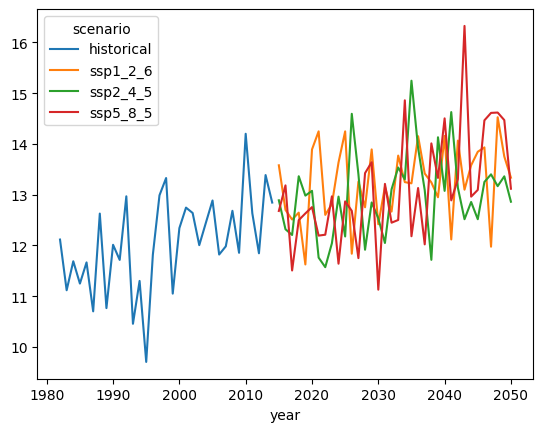

In [83]:
feat.groupby(["scenario","year"])["tmean_gs"].mean().unstack("scenario").plot()